## Binary Model building in Scikit-learn

Let's build the diabetes prediction model.

Here, you are going to predict diabetes using Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. You can download data from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1: Import libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
pima.head(10)

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
5         5      116  74     0        0  25.6     0.201   30      0
6         3       78  50    32       88  31.0     0.248   26      1
7        10      115   0     0        0  35.3     0.134   29      0
8         2      197  70    45      543  30.5     0.158   53      1
9         8      125  96     0        0   0.0     0.232   54      1

Step 2: Selecting Feature

Here, you need to define the dependent(or target variable) and independent variable(or feature variables).

In [4]:
#split dataset in features and target variable
X = pima[['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']] # Features
y = pima['label'] # Target variable

Step 3: Splitting Data

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to facilitate the reproducibility of your model.

In [5]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

Step 4: Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().



In [6]:
# instantiate the model (using the default parameters)
log_model = LogisticRegression(max_iter=1000)

# fit the model with data
log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)

Step 5: Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

Step 6: Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.



Text(0.5, 427.9555555555555, 'Predicted label')

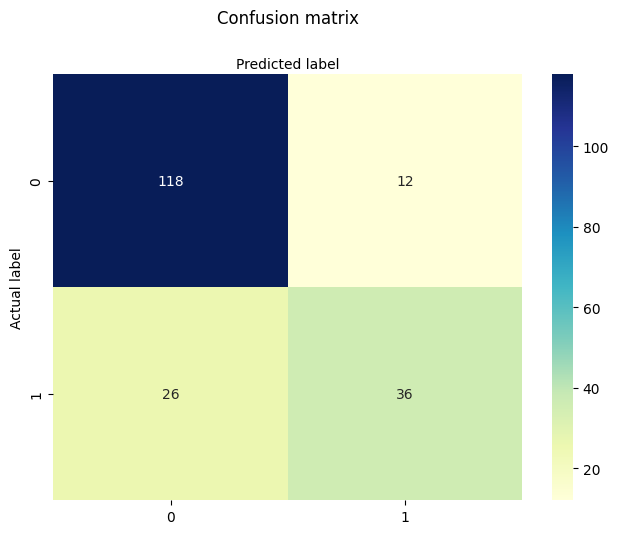

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Step 7: Confusion Matrix Evaluation Metrics

Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

**Note that: pos_label is used to define the target class in your model!**

In [9]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall = metrics.recall_score(y_test, y_pred, pos_label=1)

f1_score_calculated = 2*(precision * recall)/(precision + recall)
f1_score_package = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score by calcualtion:", f1_score_calculated)
print("F1 Score by package:", f1_score_package)

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226
F1 Score by calcualtion: 0.6545454545454547
F1 Score by package: 0.6545454545454545
